# Twitter Analysis: Toronto Tweets with Location
By: Jennifer Johnson

Exploratory Data Analysis on Twitter data filtered for Toronto Only where Geo Coordinates are available.

In [63]:
import pandas as pd
import re
import spacy
import nltk
import string
import ast
import numpy as np
import seaborn as sns

import missingno as msno

from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid") 

In [64]:
spacy.load('en')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [65]:
from spacy.lang.en import English
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from translate import Translator

parser = English()
translator = Translator(to_lang="English")

In [66]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

In [67]:
# Filter out stopwords
en_stop = set(nltk.corpus.stopwords.words('english'))

In [68]:
def processTweet(tweet):
    # process the tweets
    translator = str.maketrans('', '', string.punctuation)

    #Convert to lower case
    tweet = tweet.lower()
    
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    
    #trim
    tweet = tweet.strip('\'"')
    
    #remove punctuation from text
    tweet = tweet.translate(translator)
    
    tweet = tweet.split()
    tweet = [get_lemma(token) for token in tweet]
    tweet = [token for token in tweet if token not in en_stop]
    tweet = ' '.join(tweet)
    return tweet

In [69]:
# Load dataframe
tweets_df = pd.read_csv('D:/development/CSDA1050/playground/twitter_jj/twitter_tweets_new.csv')
tweets_df = tweets_df[tweets_df['place_country']=='Canada']
tweets_df = tweets_df[tweets_df.latitude.notnull()]
tweets_df.shape

(37220, 24)

In [70]:
tweets_df['tweet_clean'] = tweets_df['tweet_text'].apply(processTweet)

In [71]:
import pytz

In [72]:
def getTZ(tweet_date):
    est = pytz.timezone('US/Eastern')
    
    tweet_date = pd.Timestamp(tweet_date).tz_localize('UTC')
    tweet_date = tweet_date.astimezone(est)
    
    return tweet_date

In [73]:
#tweets_df['tweet_date'] = pd.Timestamp(tweets_df['tweet_date']).tz_localize('UTC')
tweets_df['tweet_date'] = tweets_df['tweet_date'].apply(getTZ)

In [74]:
tweets_df.head()

,emojis,hashtags,id,language,latitude,longitude,mentions,place_bbcoordinates,place_bbtype,place_country,...,reply_to_status,reply_to_user,sensitive,sentiment,source,tweet_date,tweet_text,user_id,user_name,tweet_clean
6,[],"['torontocontractors', 'renovation', 'interior...",1107370085608538113,en,43.716600,-79.340700,NaN,"[[[-79.639319, 43.403221], [-79.639319, 43.855...",Polygon,Canada,...,NaN,NaN,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Instagram,2019-03-17 15:56:17.007000-04:00,"Before and after, big different....\n.\n.\n.\n...",349291874,905RENO,big different torontocontractors renovation in...
7,[],NaN,1107370127874580482,en,43.670060,-79.395480,['DinaAlonzi'],"[[[-79.639319, 43.403221], [-79.639319, 43.855...",Polygon,Canada,...,NaN,NaN,False,"{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'comp...",Instagram,2019-03-17 15:56:27.084000-04:00,Simple yet Elegant. . . We love the look of wh...,122201354,DinaAlonzi,simple yet elegant love look white flower gree...
12,[],['pogey'],1107370170467663873,en,43.886417,-78.912659,"['BollocksBar', 'merimacband']","[[[-79.047315, 43.589036], [-79.047315, 44.028...",Polygon,Canada,...,NaN,NaN,False,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp...",Instagram,2019-03-17 15:56:37.239000-04:00,Some fine Irish dancing at the @BollocksBar! M...,134236541,gradybrothers,fine irish dancing grady brother plus pogey co...
20,[],"['comingthisweek', 'mls', 'wardenandstclair']",1107370314575405056,et,43.659360,-79.346680,NaN,"[[[-79.639319, 43.403221], [-79.639319, 43.855...",Polygon,Canada,...,NaN,NaN,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Instagram,2019-03-17 15:57:11.597000-04:00,3 Bedroom Town w/ 3 Car Parking!\n#comingthisw...,22251504,torontoben,3 bedroom town w 3 car parking comingthisweek ...
28,[],['Purchasing'],1107370446905696256,en,43.647437,-79.380931,NaN,"[[[-79.639319, 43.403221], [-79.639319, 43.855...",Polygon,Canada,...,NaN,NaN,False,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",CareerArc 2.0,2019-03-17 15:57:43.147000-04:00,TD Bank is looking for teammates like you. See...,185516231,tmj_GTA_purch,td bank looking teammate like see latest purch...


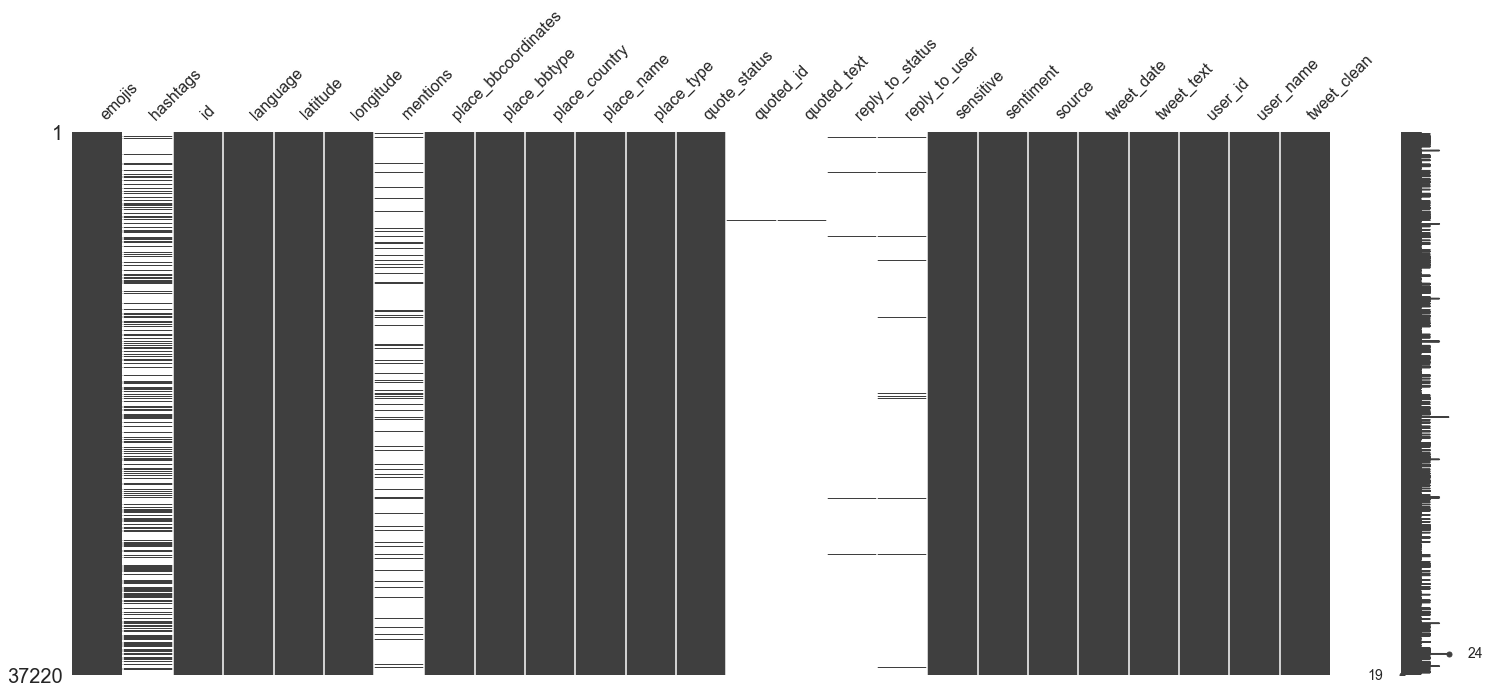

In [75]:
# check for missing data
msno.matrix(tweets_df)

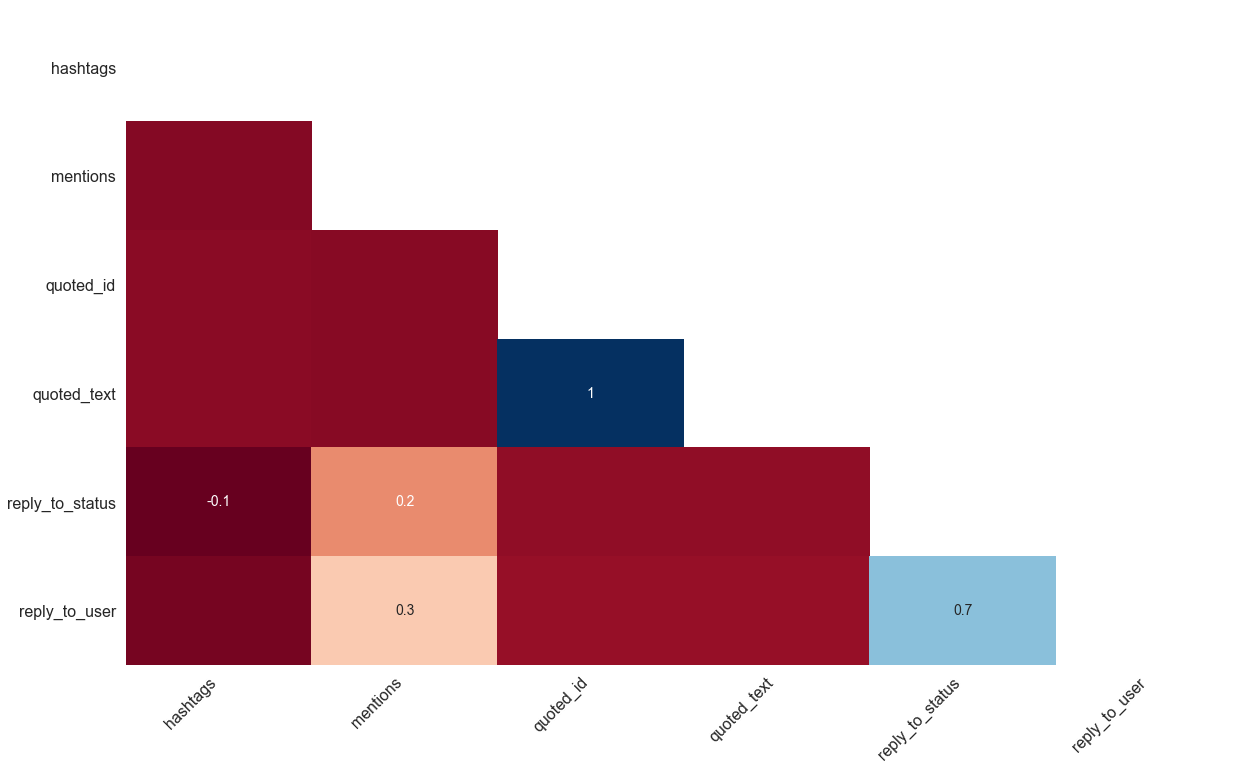

In [76]:
# missing correlation matrix
msno.heatmap(tweets_df)

In [77]:
# changing tweet_date to DateTime column
tweets_df.tweet_date = pd.to_datetime(tweets_df['tweet_date'])

In [78]:
tweets_df.dtypes

emojis                                     object
hashtags                                   object
id                                          int64
language                                   object
latitude                                  float64
longitude                                 float64
mentions                                   object
place_bbcoordinates                        object
place_bbtype                               object
place_country                              object
place_name                                 object
place_type                                 object
quote_status                                 bool
quoted_id                                 float64
quoted_text                                object
reply_to_status                           float64
reply_to_user                              object
sensitive                                    bool
sentiment                                  object
source                                     object


In [79]:
# Tweets by Date
# See how many tweets come in at a time from streaming
tweets_df['tweet_time'] = tweets_df['tweet_date'].values.astype('datetime64[m]')
tweets_date = tweets_df.groupby('tweet_time').id.agg('count').reset_index(name='count')
tweets_date.head()

,tweet_time,count
0,2019-03-17 19:56:00,3
1,2019-03-17 19:57:00,2
2,2019-03-17 19:59:00,1
3,2019-03-17 20:00:00,4
4,2019-03-17 20:02:00,5


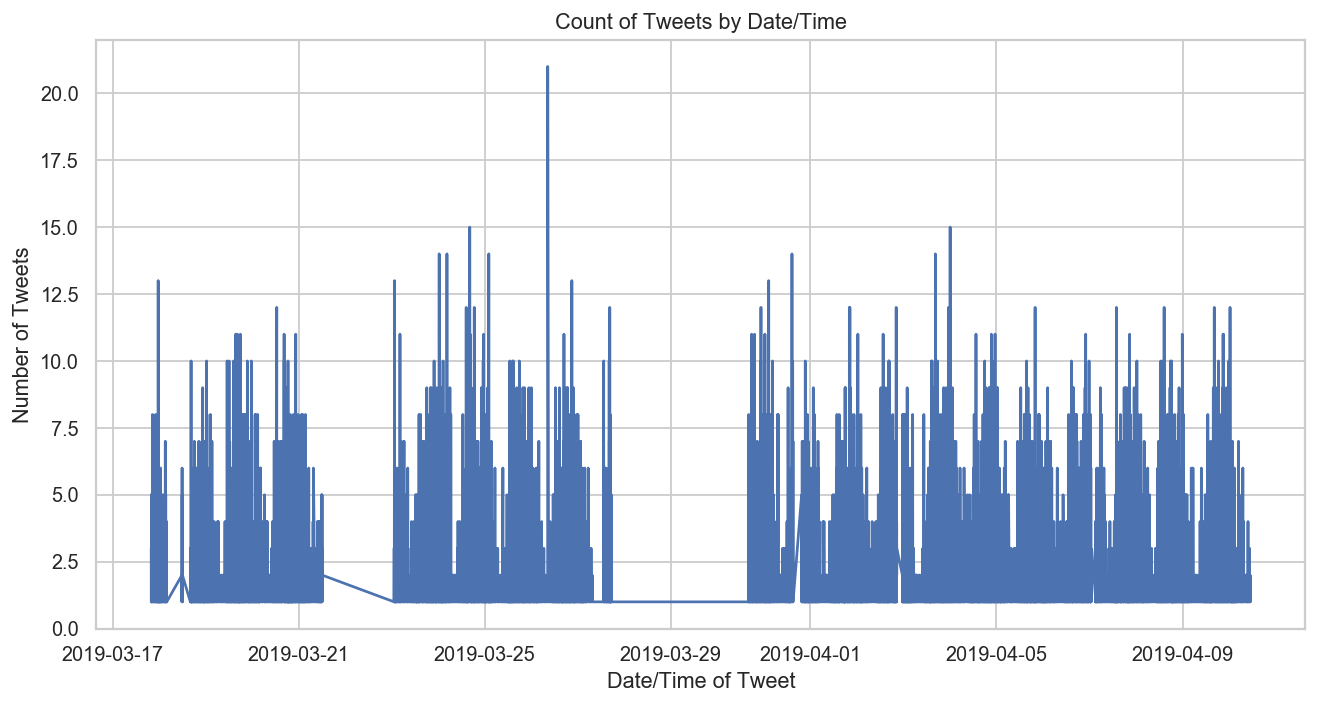

In [80]:
x = tweets_date['tweet_time']; y = tweets_date['count']

plt.figure(figsize=(12,6), dpi=130)
plt.xlabel('Date/Time of Tweet', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.title('Count of Tweets by Date/Time')
plt.plot(x, y)
plt.show()

In [81]:
tweets_df['tweet_dt']= tweets_df['tweet_date'].dt.normalize()
# Number of Tweets by Day
tweets_day = tweets_df.groupby('tweet_dt')['id'].count()
tweets_day.head()

tweet_dt
2019-03-17 00:00:00-04:00     863
2019-03-18 00:00:00-04:00    1157
2019-03-19 00:00:00-04:00    1981
2019-03-20 00:00:00-04:00    2129
2019-03-21 00:00:00-04:00     292
Name: id, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:533: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  np.asarray(values).astype(np.float)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  g_vals = np.asarray(grouped_vals.get_group(g))


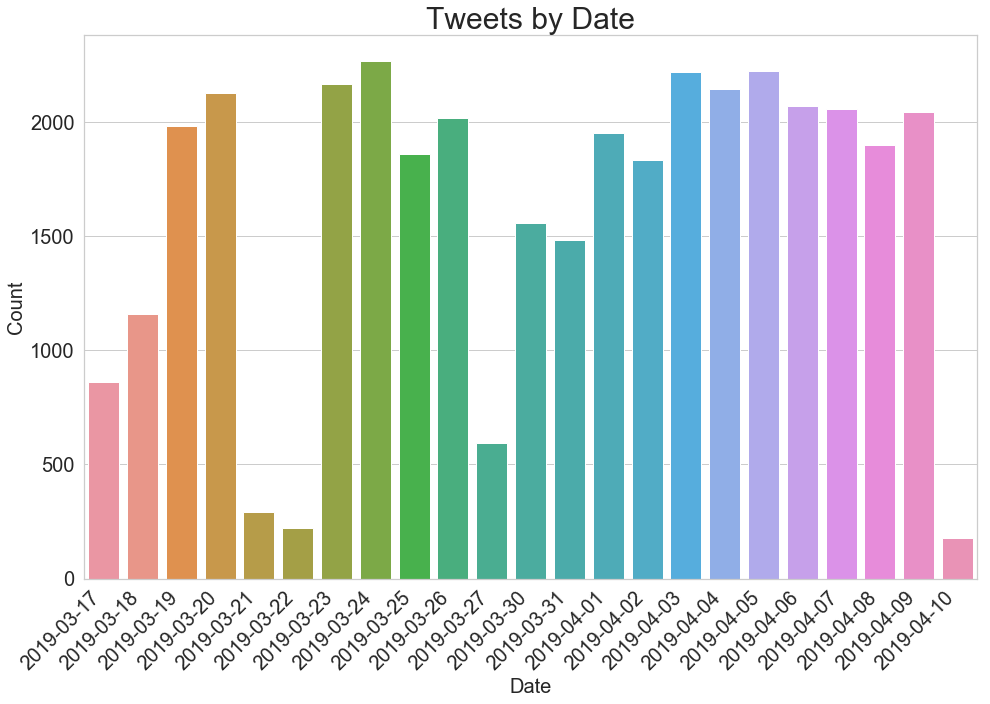

In [82]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x='tweet_dt', data=tweets_df)
x_dates = tweets_df['tweet_dt'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
ax.axes.set_title("Tweets by Date",fontsize=30)
ax.set_xlabel("Date",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=20)

In [83]:
tweets_df['tweet_hour'] = tweets_df.tweet_date.dt.hour
# Number of Tweets by Time of Day
tweets_tod = tweets_df.groupby('tweet_hour')['id'].count().reset_index(name='count')
tweets_tod.head()

,tweet_hour,count
0,0,853
1,1,617
2,2,462
3,3,338
4,4,288


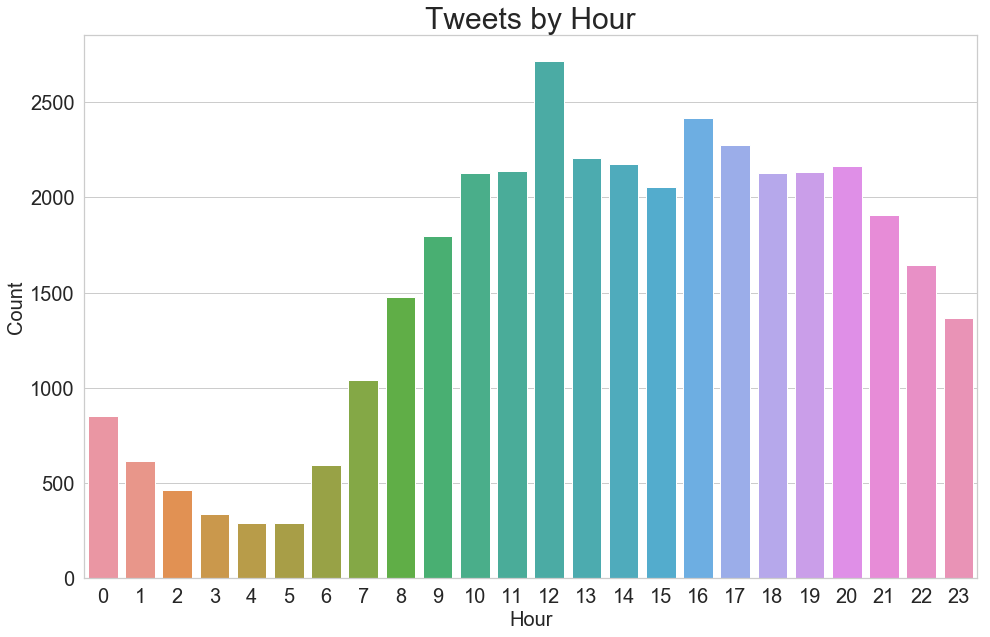

In [84]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x='tweet_hour', data=tweets_df)
ax.axes.set_title("Tweets by Hour",fontsize=30)
ax.set_xlabel("Hour",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=20)

In [85]:
tweets_df['tweet_dow'] = pd.to_datetime(tweets_df['tweet_date']).dt.dayofweek
# Number of Tweets by Day of Week
tweets_dow = tweets_df.groupby('tweet_dow')['id'].count().reset_index(name='count')
tweets_dow.head()

,tweet_dow,count
0,0,6871
1,1,7877
2,2,5122
3,3,2437
4,4,2445


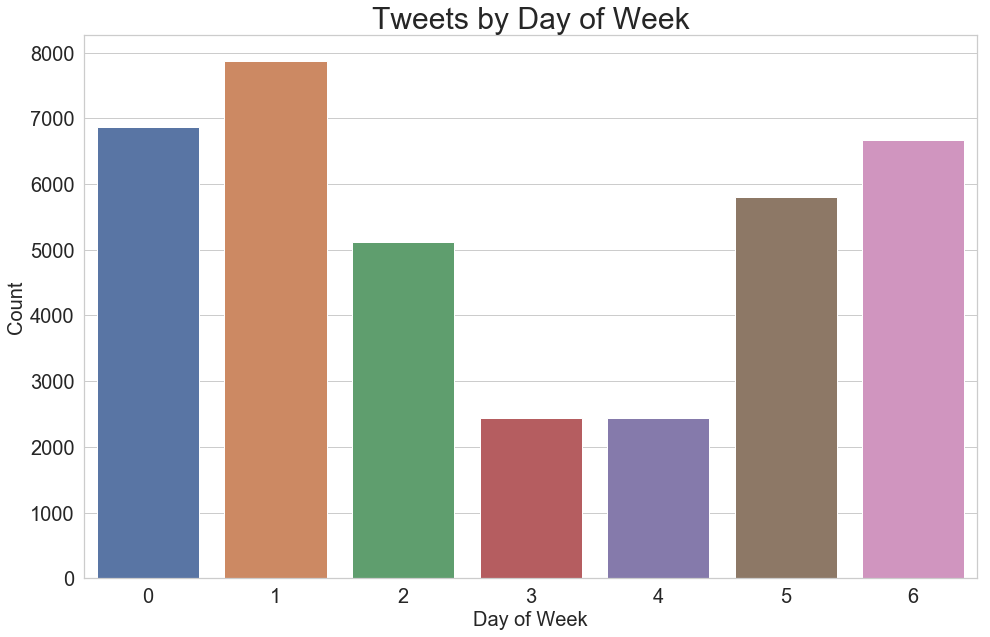

In [86]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x='tweet_dow', data=tweets_df)
ax.axes.set_title("Tweets by Day of Week",fontsize=30)
ax.set_xlabel("Day of Week",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=20)

In [87]:
tweets_dh = tweets_df.groupby(['tweet_dt', 'tweet_hour'])['id'].count() \
.reset_index(name='count')
tweets_dh.head()

,tweet_dt,tweet_hour,count
0,2019-03-17 00:00:00-04:00,15,6
1,2019-03-17 00:00:00-04:00,16,133
2,2019-03-17 00:00:00-04:00,17,120
3,2019-03-17 00:00:00-04:00,18,126
4,2019-03-17 00:00:00-04:00,19,133


In [88]:
tweets_dh['tweet_dt'] = tweets_dh['tweet_dt'].apply(lambda x: x.strftime('%Y-%m-%d'))

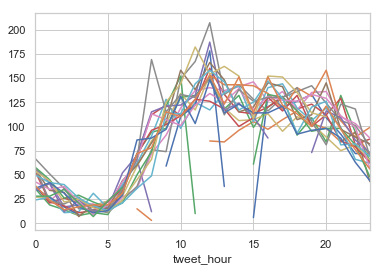

In [89]:
tweets_dh \
    .groupby([tweets_dh.tweet_hour.name, tweets_dh.tweet_dt.name])\
    .sum() \
    .unstack() \
    .plot(legend=False)

#### Tweets by Hour of Day (Broken out by Day)
To show gaps in the data load


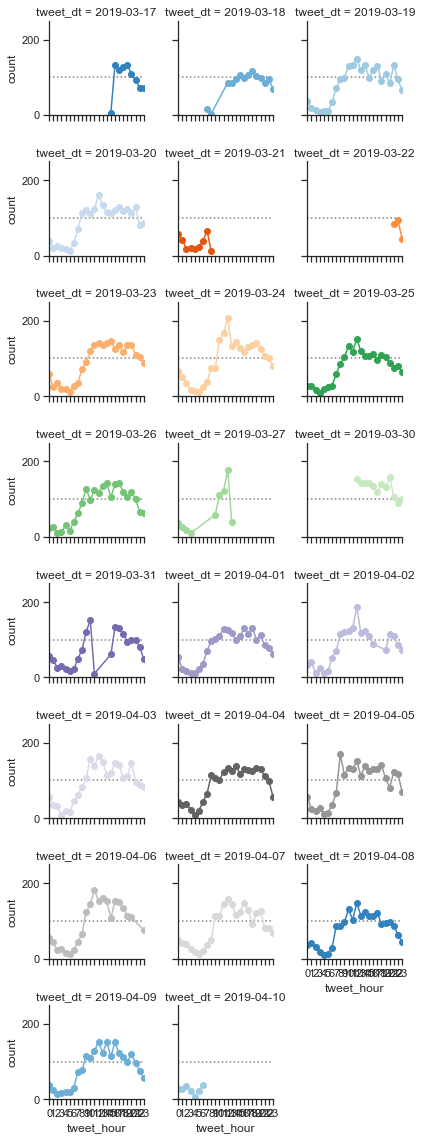

In [90]:
sns.set(style="ticks")

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(tweets_dh, col="tweet_dt", hue="tweet_dt", palette="tab20c",
                     col_wrap=3, height=2)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=100, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "tweet_hour", "count", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(24), yticks=[0, 200],
         xlim=(0, 23), ylim=(0, 250))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

#### Tweets by User
Difference in Top 5 list, "511NY", "BrendaLeeNY", and "gleexhy" are replaced with "biggles14", "alyaly89770924", and "Aliya313" with the filter to only include Canada tweets.

In [91]:
# Number of Tweets by User
tweets_users = tweets_df.groupby('user_name')['id'].count() \
.reset_index(name='count') \
.sort_values(['count'], ascending=False)
tweets_users.head()

,user_name,count
6720,tofire,2930
6724,tofireS,1018
6794,ufcfy3,757
6725,tofireW,654
6723,tofireN,629


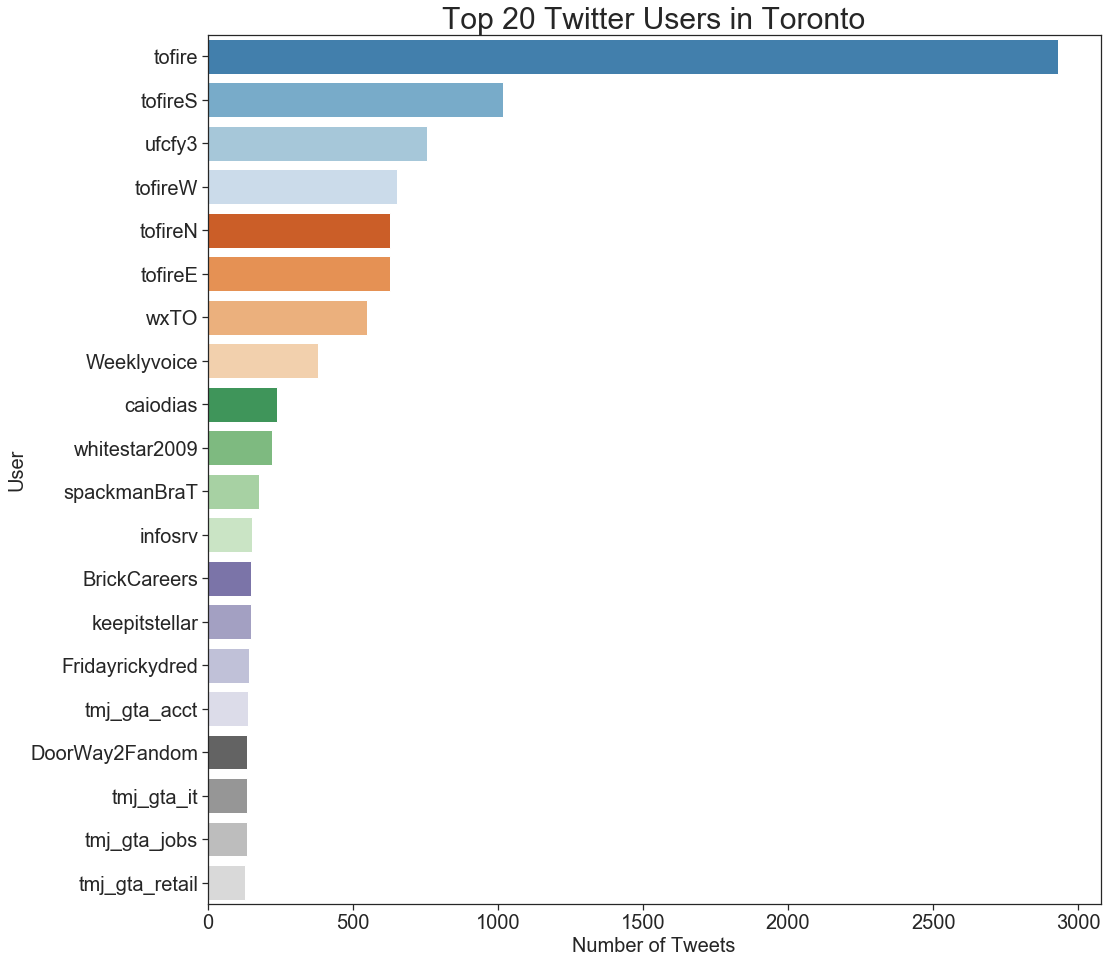

In [92]:
#tweets_df['user_name'].value_counts()[:20].plot(kind='barh')
#top_users = tweets_users.head(20)

plt.figure(figsize=(16,16))
ax = sns.barplot( x='count', y='user_name', data=tweets_users.head(20), palette="tab20c")
ax.axes.set_title("Top 20 Twitter Users in Toronto",fontsize=30)
ax.set_xlabel("Number of Tweets",fontsize=20)
ax.set_ylabel("User",fontsize=20)
ax.tick_params(labelsize=20)

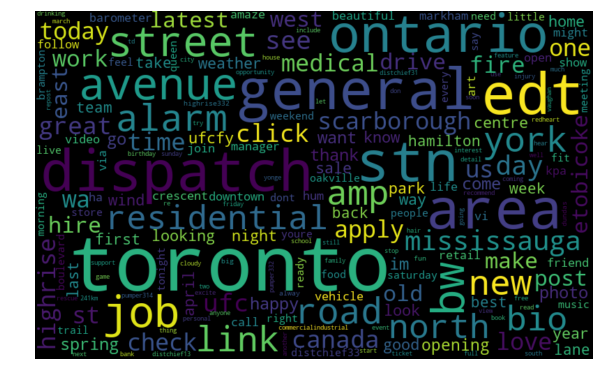

In [93]:
all_words = ' '.join([text for text in tweets_df['tweet_clean']])
wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110, collocations=False).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### Top Words
The top word listed have moved "Toronto" to the top from 4 place previously, vs "wa".  No new words found in the top 5

In [94]:
# count of words
words = nltk.tokenize.word_tokenize(all_words)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(30),
                    columns=['Word', 'Frequency'])
rslt_words = rslt[rslt['Word'].str.len() > 2]
rslt_words.head()

,Word,Frequency
0,toronto,12050
1,edt,5986
2,area,5891
3,dispatch,5885
4,stn,5885


##### Top 20 Words
"Ontario" is the only new word shown in the list with the filter applied, which removed "new" which was probably in the Top 20 previously because of the New York data included.

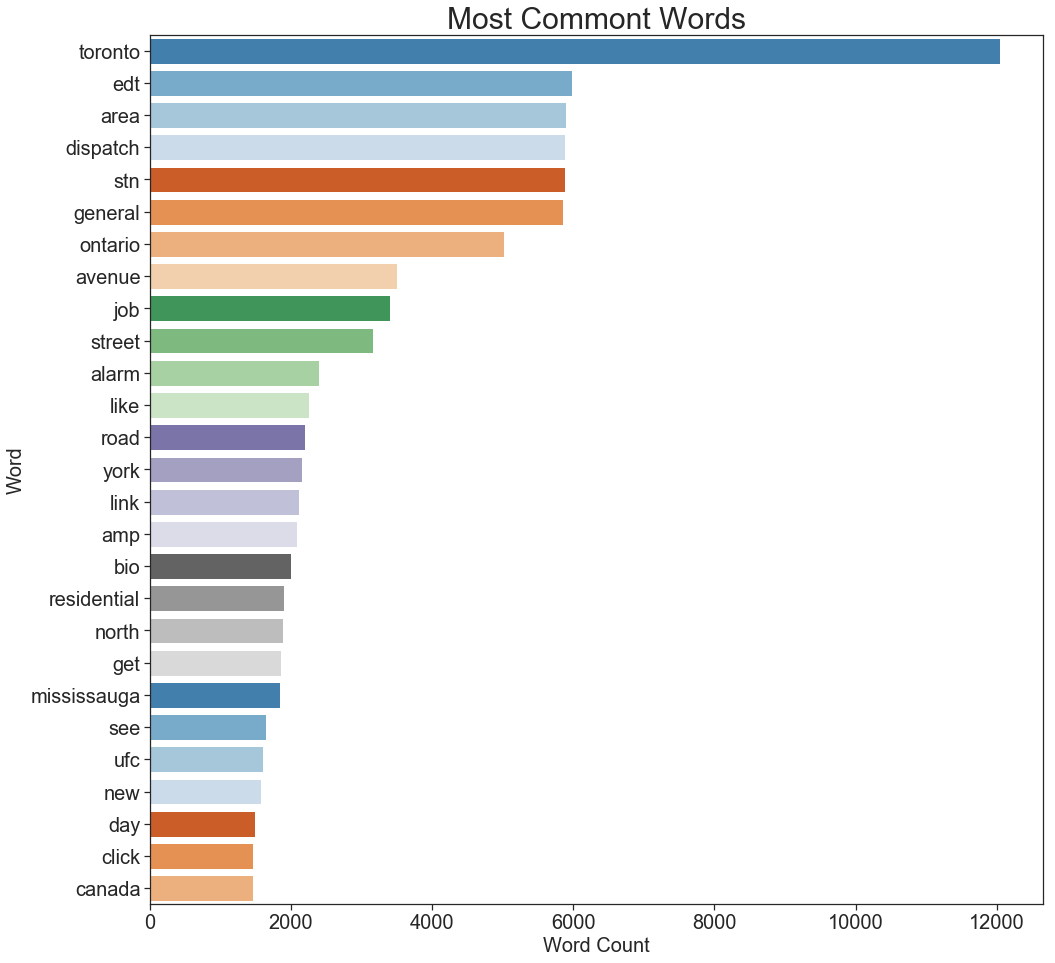

In [95]:
#ax = rslt_words.plot.barh(x='Word', y='Frequency')
plt.figure(figsize=(16,16))
ax = sns.barplot( x='Frequency', y='Word', data=rslt_words, palette="tab20c")
ax.axes.set_title("Most Commont Words",fontsize=30)
ax.set_xlabel("Word Count",fontsize=20)
ax.set_ylabel("Word",fontsize=20)
ax.tick_params(labelsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


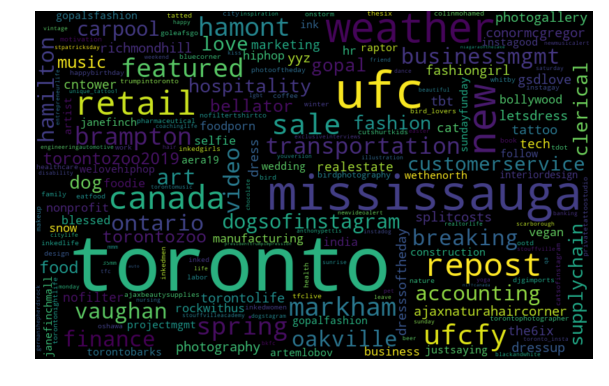

In [96]:
# Filter for tweets with hashtags
tweets_hash_df = tweets_df[tweets_df.hashtags.notnull()]
tweets_hash_df['hashtags'] = tweets_hash_df['hashtags'].apply(ast.literal_eval)
tweets_hash_df['hash'] = tweets_hash_df['hashtags'].apply(', '.join).str.lower()
hash_words = ', '.join([text for text in tweets_hash_df['hash']])
wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110, collocations=False).generate(hash_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### Top Hashtags
"Rochester" (2) was removed from the Top 5 hashtags and replaced with "cdnpoli" (5).  

In [97]:
words = nltk.tokenize.word_tokenize(hash_words)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(20),
                    columns=['Word', 'Frequency'])
rslt = rslt[rslt['Word'].str.len() > 1]
rslt.head()

,Word,Frequency
1,toronto,2306
2,ufc,659
3,mississauga,629
4,weather,443
5,news,397


Words removed after filter
- rochester
- i90nysthruway
- traffic
- taconicstateparkway

Words added after filter
- wethenorth
- gohabsgo
- trumpresign
- habs

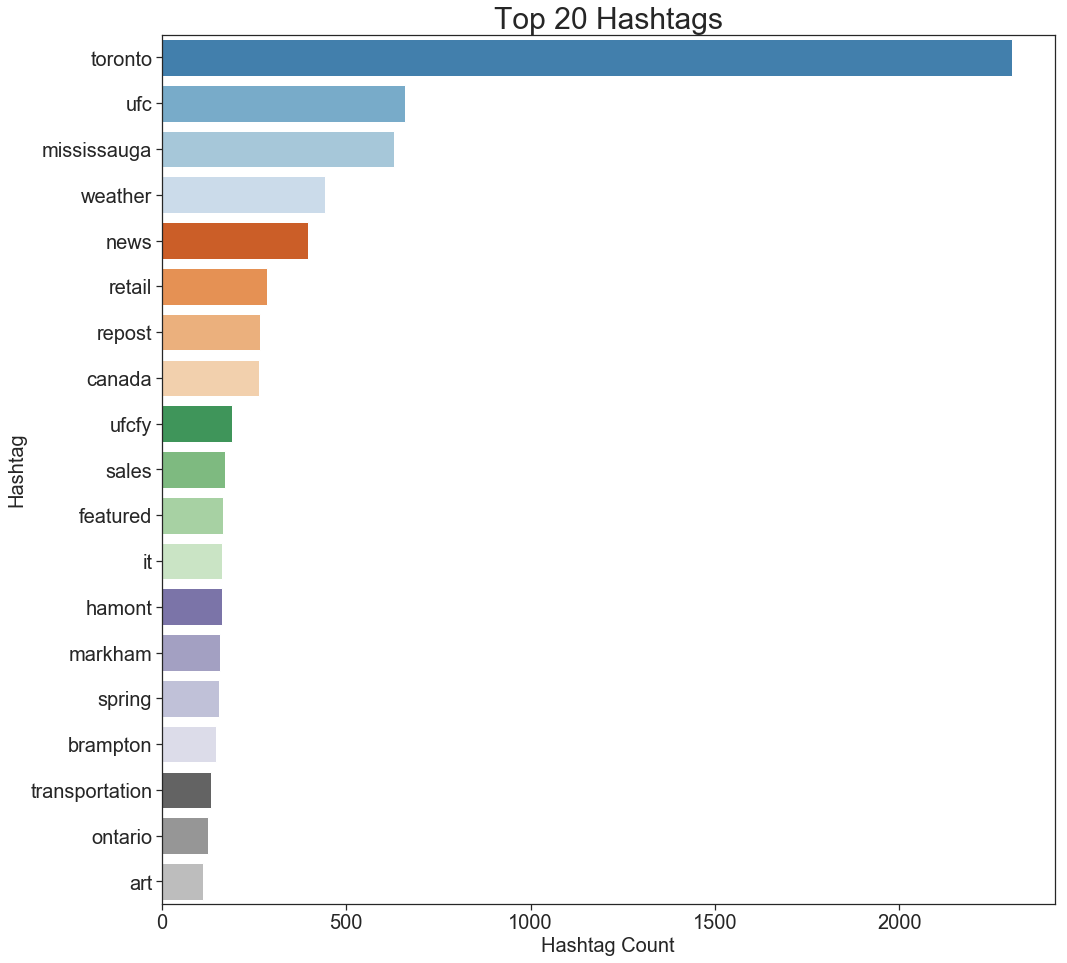

In [98]:
#ax = rslt.plot.barh(x='Word', y='Frequency')
plt.figure(figsize=(16,16))
ax = sns.barplot( x='Frequency', y='Word', data=rslt, palette="tab20c")
ax.axes.set_title("Top 20 Hashtags",fontsize=30)
ax.set_xlabel("Hashtag Count",fontsize=20)
ax.set_ylabel("Hashtag",fontsize=20)
ax.tick_params(labelsize=20)

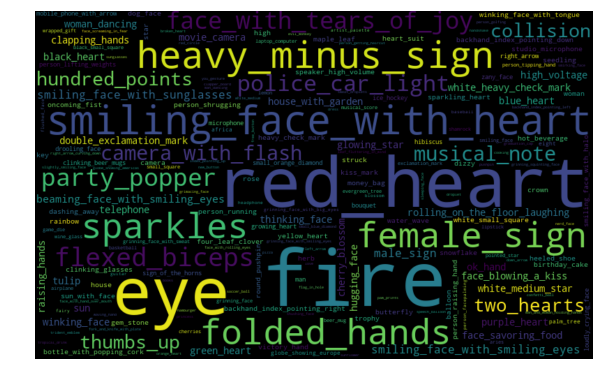

In [99]:
# Filter for tweets with emojis
tweets_emoji_df = tweets_df[tweets_df.hashtags.notnull()]
tweets_df['emojis'] = tweets_df['emojis'].apply(ast.literal_eval)
tweets_df['emo'] = tweets_df['emojis'].apply(', '.join).str.lower()
emoji_words = ', '.join([text for text in tweets_df['emo']])
wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110, collocations=False).generate(emoji_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

"fire" replaces "smiling_face_with_heart-eyes" once the filter has been applied.

In [100]:
# remove punctuation
#tweets_df['emojis'] = tweets_df['emojis'].str.translate(translator)
tweets_df['emo'] = tweets_df['emo'].str.replace(":,", "").str.strip()



a = tweets_df['emo'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(20),
                    columns=['Word', 'Frequency'])
rslt = rslt.drop(rslt.index[0])
rslt.head()

,Word,Frequency
1,fire,959
2,red_heart,774
3,smiling_face_with_heart-eyes,493
4,heavy_minus_sign,419
5,female_sign,367


"winking_face" is replaced with "revolving_hearts" in the top 20

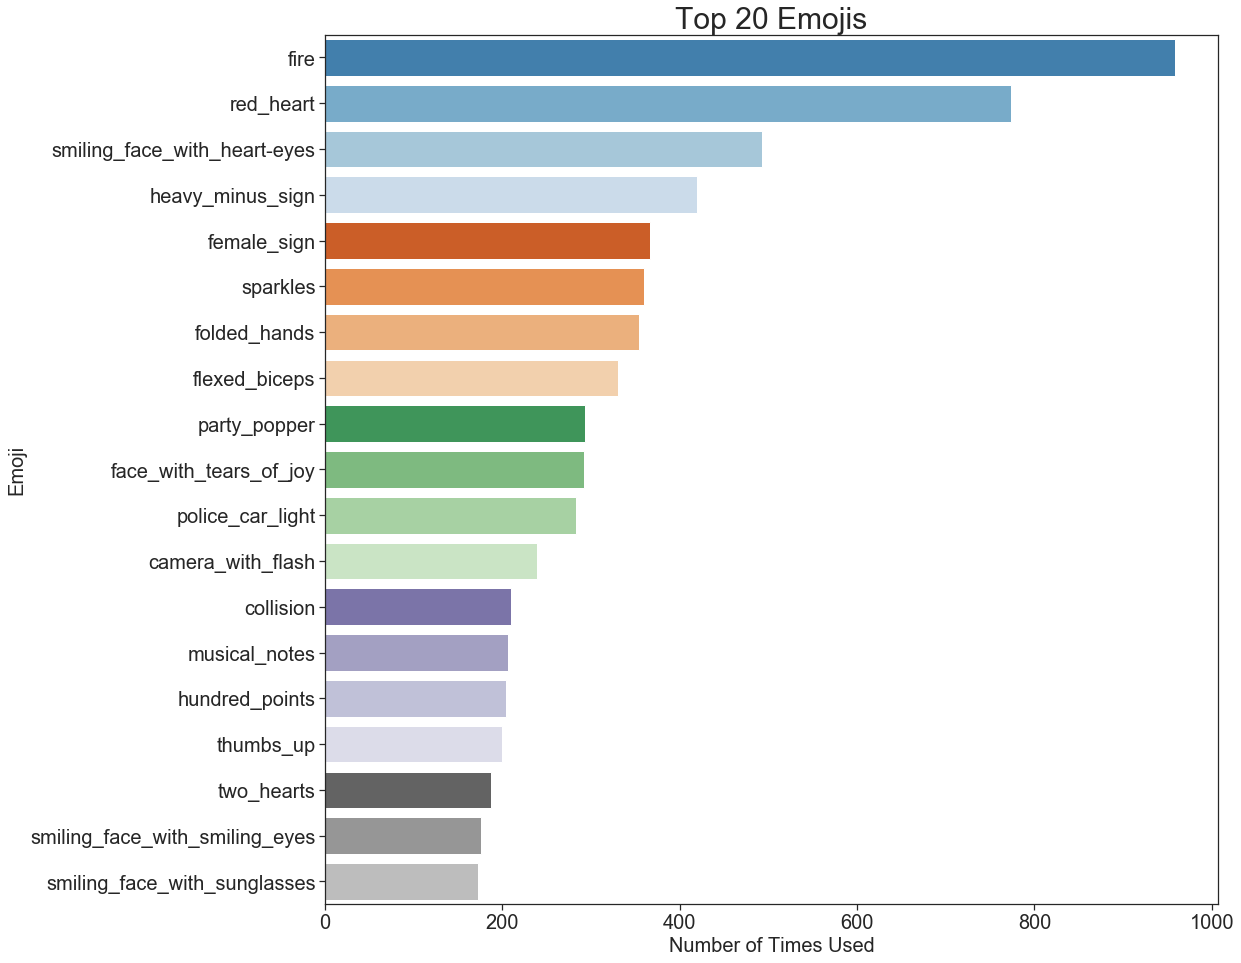

In [101]:
#ax = rslt.plot.barh(x='Word', y='Frequency')
plt.figure(figsize=(16,16))
ax = sns.barplot( x='Frequency', y='Word', data=rslt, palette="tab20c")
ax.axes.set_title("Top 20 Emojis",fontsize=30)
ax.set_xlabel("Number of Times Used",fontsize=20)
ax.set_ylabel("Emoji",fontsize=20)
ax.tick_params(labelsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


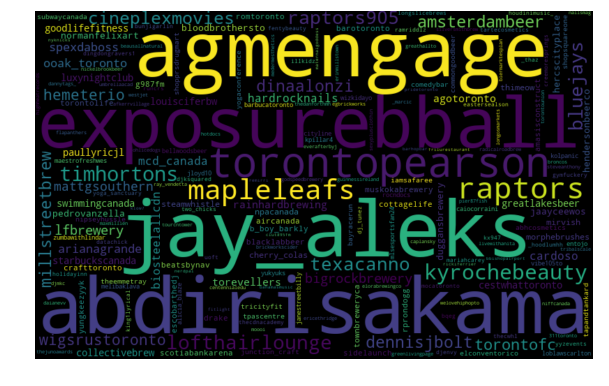

In [102]:
# Filter for tweets with mentions
tweets_mentions_df = tweets_df[tweets_df.mentions.notnull()]
tweets_mentions_df['mentions'] = tweets_mentions_df['mentions'].apply(ast.literal_eval)
tweets_mentions_df['ment'] = tweets_mentions_df['mentions'].apply(', '.join).str.lower()
mentions_words = ', '.join([text for text in tweets_mentions_df['ment']])
wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110, collocations=False).generate(mentions_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Mentions Analysis
Remove punctuation in mention list and make a bag of words, this will count the number of tweets where a specific tweet user is mentioned.
Return list of Top 5 Mentions

youtube is replaced with "andrewscheer" which makes 4 of 5 mention politicians.

In [103]:
# remove punctuation
#tweets_hash_df['hash'] = tweets_hash_df['hash'].str.translate(translator)
tweets_mentions_df['ment'] = tweets_mentions_df['ment'].str.replace(",", "").str.strip()

a = tweets_mentions_df['ment'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(20),
                    columns=['Word', 'Frequency'])
rslt.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Word,Frequency
0,jay_aleks,50
1,agmengage,50
2,abdirisakama,50
3,exposurebball,41
4,torontopearson,39


Political mentions: (8 of Top 20)
- realdonaldtrump
- fordnation
- justintrudeau
- andrewscheer ("Leader of Canada's Conservatives...")
- puglaas ("MP for Vancouver-Granville")


Additions
- acoyne
- lisathompsonmpp
- mapleleafs
- kalel84
- mikeschmidt09


Removed 
- aoc ("Congresswoman for NY-14")
- bts_twt
- dougarrell
- potus (President Trump - White House)
- gop (Republican National Committee)

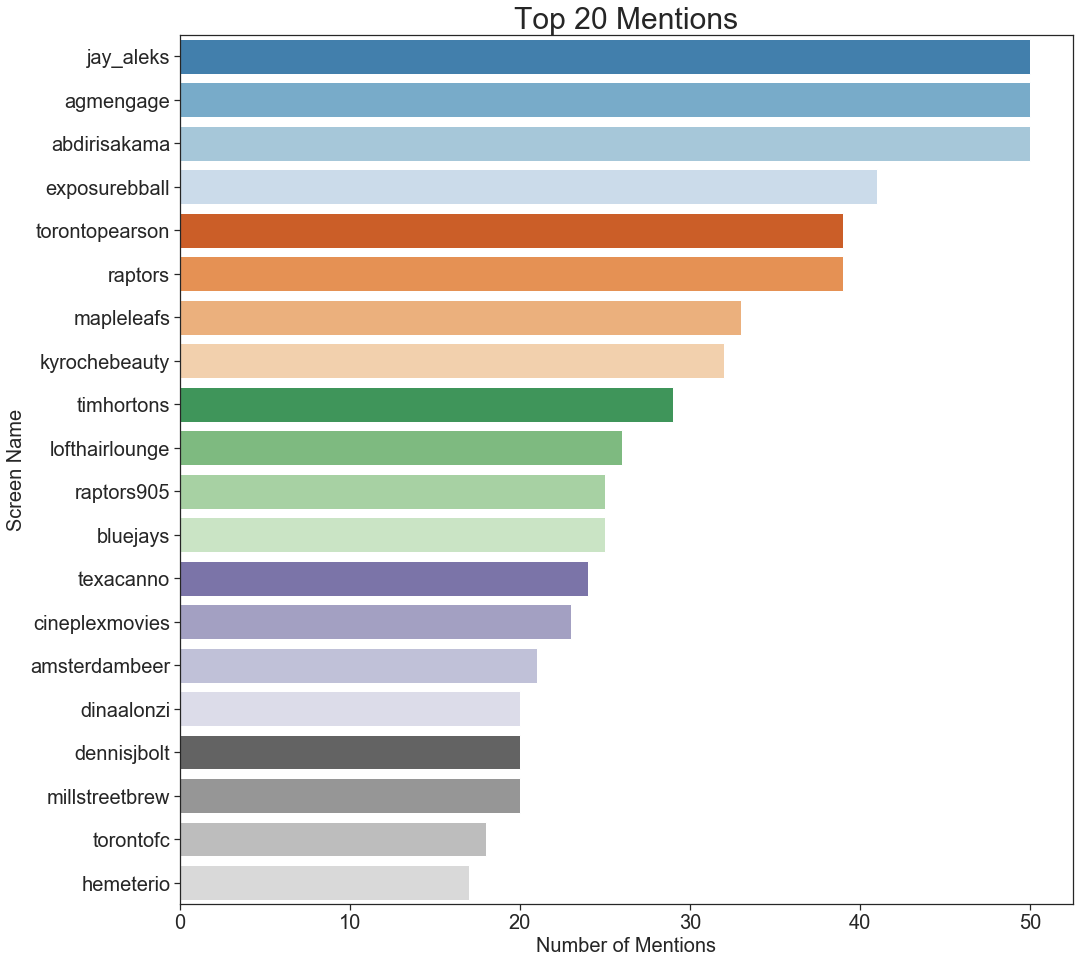

In [104]:
plt.figure(figsize=(16,16))
ax = sns.barplot( x='Frequency', y='Word', data=rslt, palette="tab20c")
ax.axes.set_title("Top 20 Mentions",fontsize=30)
ax.set_xlabel("Number of Mentions",fontsize=20)
ax.set_ylabel("Screen Name",fontsize=20)
ax.tick_params(labelsize=20)

In [105]:
# How to find the polygon center coordinates
def centroid(vertexes):
     _x_list = [vertex [0] for vertex in vertexes]
     _y_list = [vertex [1] for vertex in vertexes]
     _len = len(vertexes)
     _x = sum(_x_list) / _len
     _y = sum(_y_list) / _len
     return(_x, _y)

In [106]:
polygon_data = ((0, 0), (1, 0), (1, 1), (0, 1))
print(centroid(polygon_data)) # (0.5, 0.5)

(0.5, 0.5)
